## TP1 - Visión por Computadora 1

### Parte 1. White Patch

1) Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_patch(image):
    img = image.astype(np.float32)
    
    # Asumimos que los valores máximos de color en los 
    # tres canales es el color del blanco bajo la luz de la 
    # escena.
    Rmax = np.max(img[:,:,2])
    Gmax = np.max(img[:,:,1])
    Bmax = np.max(img[:,:,0])
    
    # Log
    print("Maximos: Rojo", Rmax, "Verde", Gmax, "Azul", Bmax)
    
    # Evitar divisiones por cero
    Rmax = max(Rmax, 1)
    Gmax = max(Gmax, 1)
    Bmax = max(Bmax, 1)

    # Normalizamos entonces al color de la luz blanca puro 
    # (255, 255, 255)
    img[:,:,2] = img[:,:,2] * (255.0 / Rmax)
    img[:,:,1] = img[:,:,1] * (255.0 / Gmax)
    img[:,:,0] = img[:,:,0] * (255.0 / Bmax)
    
    # Mantener valores válidos 0 - 255
    img = np.clip(img, 0, 255)
    
    return img.astype(np.uint8)

2) Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Primero los resultados:

Maximos: Rojo 247.0 Verde 157.0 Azul 175.0


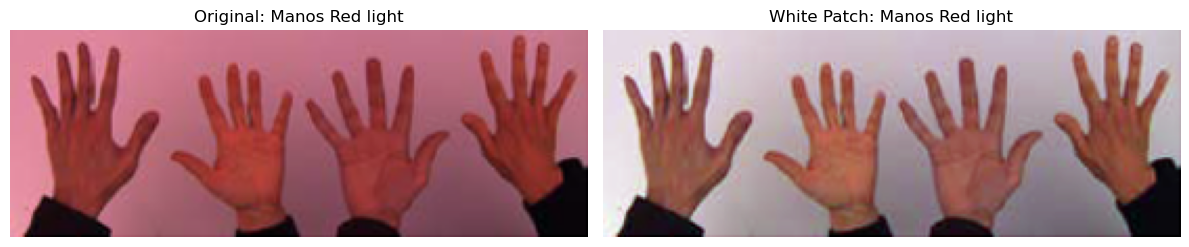

Maximos: Rojo 210.0 Verde 250.0 Azul 171.0


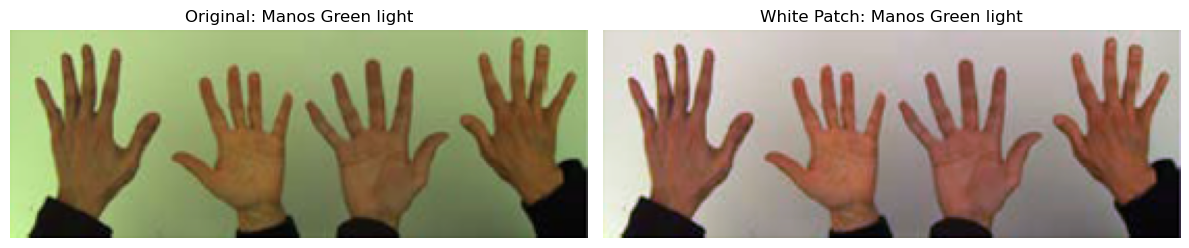

Maximos: Rojo 165.0 Verde 138.0 Azul 200.0


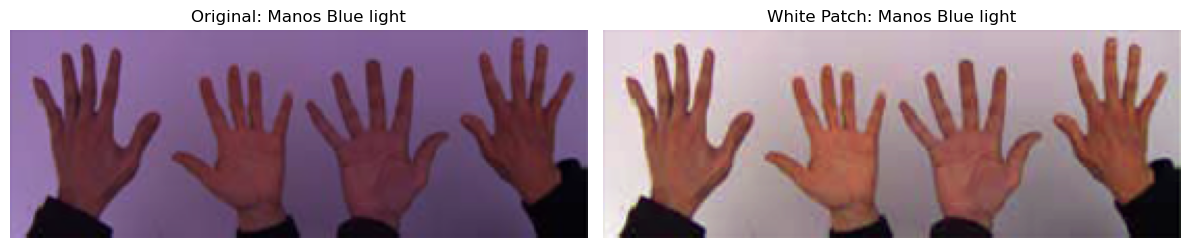

Maximos: Rojo 255.0 Verde 255.0 Azul 255.0


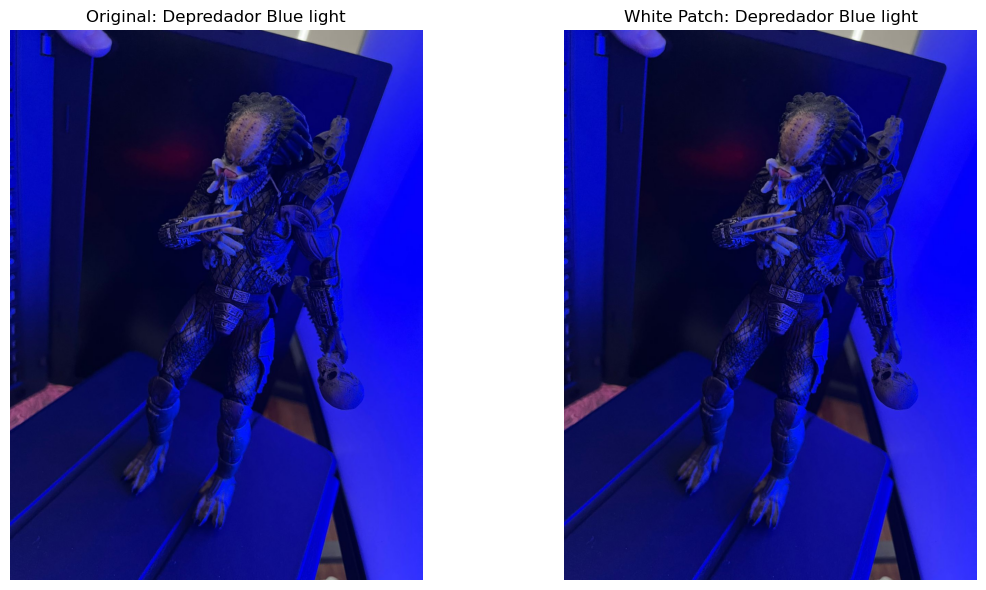

Maximos: Rojo 126.0 Verde 252.0 Azul 155.0


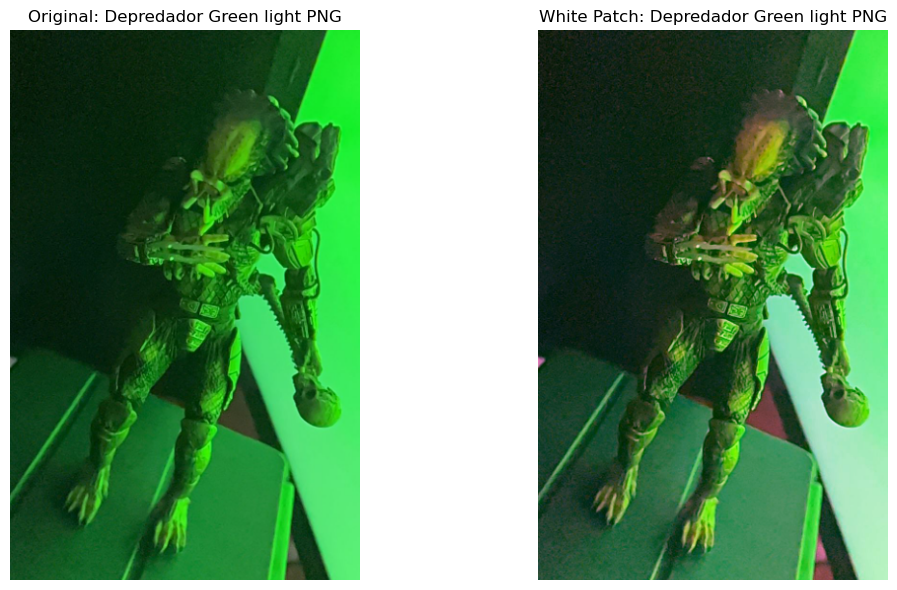

Maximos: Rojo 170.0 Verde 255.0 Azul 172.0


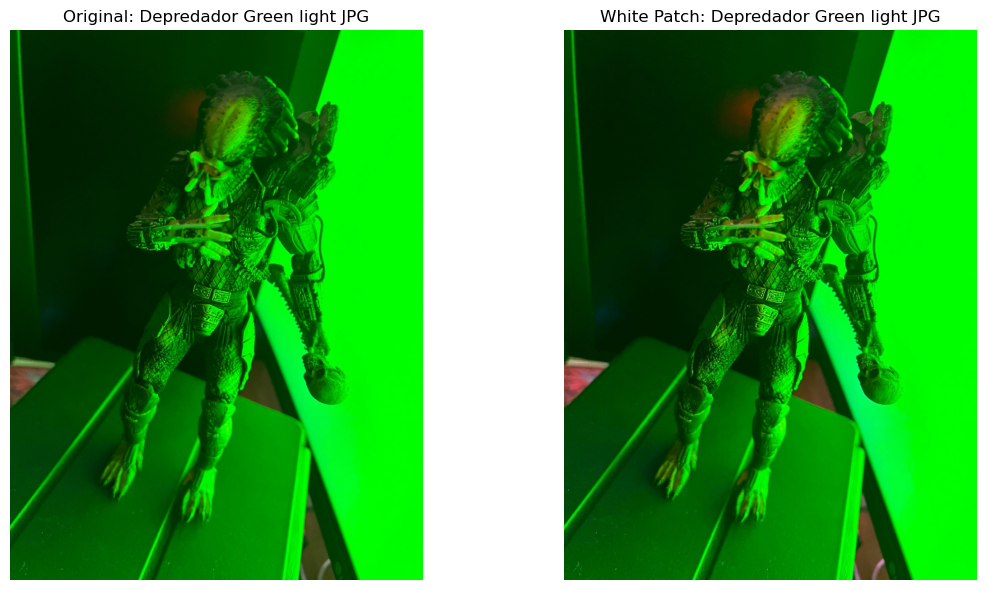

Maximos: Rojo 255.0 Verde 134.0 Azul 122.0


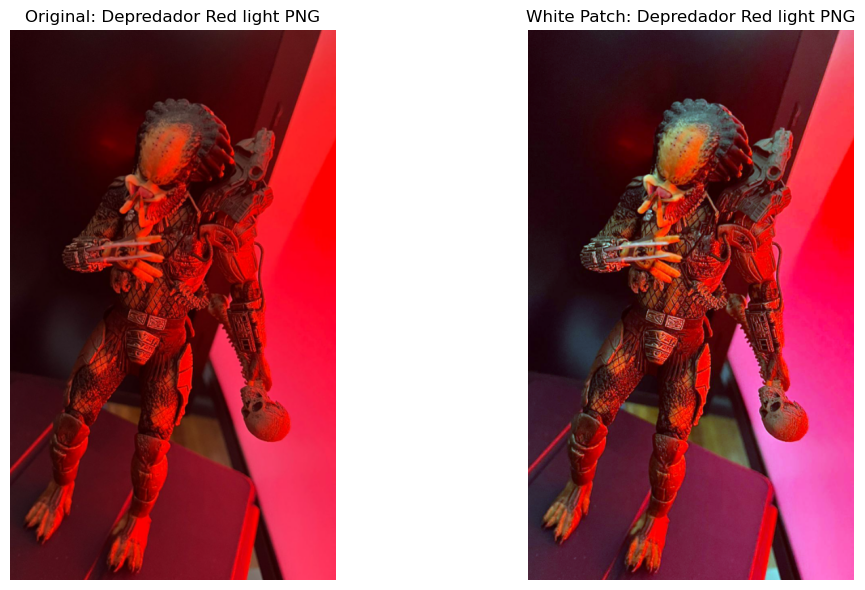

Maximos: Rojo 255.0 Verde 201.0 Azul 203.0


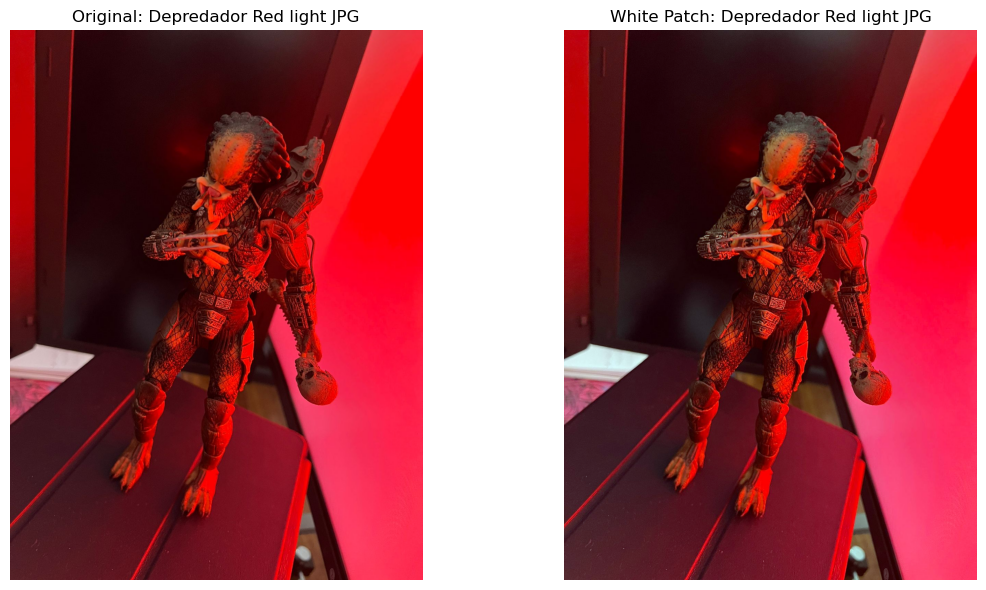

In [55]:

def mostrar_comparacion(original, corregida, titulo):
    """
    Muestra la imagen original y la corregida una al lado de la otra.
    """
    # Paso la imagen de BRG a RGB
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    corregida_rgb = cv2.cvtColor(corregida, cv2.COLOR_BGR2RGB)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(original_rgb)
    ax1.set_title(f"Original: {titulo}")
    ax1.axis('off')

    ax2.imshow(corregida_rgb)
    ax2.set_title(f"White Patch: {titulo}")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Imágenes de prueba
test_r = cv2.imread("white_patch/test_red.png")
test_g = cv2.imread("white_patch/test_green.png")
test_b = cv2.imread("white_patch/test_blue.png")

wp_blue = cv2.imread("white_patch/wp_blue.jpg")
wp_green1 = cv2.imread("white_patch/wp_green.png")
wp_green2 = cv2.imread("white_patch/wp_green2.jpg")
wp_red1 = cv2.imread("white_patch/wp_red.png")
wp_red2 = cv2.imread("white_patch/wp_red2.jpg")

# Diccionarios de imágenes para mostrar
imgs_test = {
    "Manos Red light": test_r,
    "Manos Green light": test_g,
    "Manos Blue light": test_b,
}

imgs_wp = {
    "Depredador Blue light": wp_blue,
    "Depredador Green light PNG": wp_green1,
    "Depredador Green light JPG": wp_green2,
    "Depredador Red light PNG": wp_red1,
    "Depredador Red light JPG": wp_red2,
}

def show_results(images_dict):
    for titulo, img in images_dict.items():
        mostrar_comparacion(img, white_patch(img), titulo)
        
show_results(imgs_test)
show_results(imgs_wp)

En relación a las fallas, 
##### TO DO 
Hacer el análisis de valores máximos de cada canal, saturación (ej depredador blue todos los max son 255), dominancia de color en las demás del depredador, y sugerir / implementar una posible solución. 

In [56]:
# TODO posible solución

### Parte 2
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y 
visualizarlas.

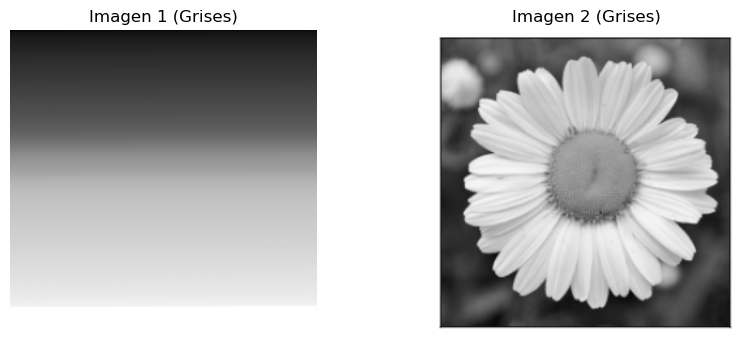

In [57]:
# Cargar imágenes en escala de grises
img1 = cv2.imread("img1_tp.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img2_tp.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1 (Grises)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2 (Grises)")
plt.axis('off')

plt.show()


2) Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas 
entre si.

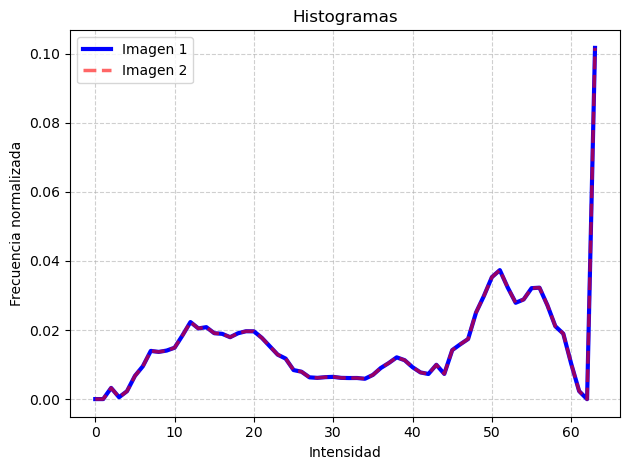

In [58]:
# # Número de bins
bins = 64  

# Calcular histogramas
#hist1, bins = np.histogram(img1.ravel(), bins, range=(0, 256))
#hist2, bins = np.histogram(img2.ravel(), bins, range=(0, 256))
hist1 = cv2.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [bins], [0, 256])

# Normalizar para comparar
hist1 = hist1 / hist1.sum()
hist2 = hist2 / hist2.sum()

plt.plot(hist1, 
         color='blue',    
         linewidth=3,    
         linestyle='-',    
         label='Imagen 1')

plt.plot(hist2, 
         color='red', 
         alpha=0.6,        
         linewidth=2.5,    
         linestyle='--',
         label='Imagen 2')

plt.title('Histogramas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia normalizada')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Mejorar los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección 
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

##### TO DO

En un principio se ven exáctamente iguales los histogramas, para entrenar un modelo se necesitarían características adicionales que capturen otra información.